In [1]:
import DSGRN

# Basic usage

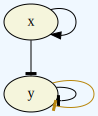

In [2]:
# <+> or <-> at the beginning of the network specification
# indicates positive or negative linear decay
# <-> is the default so it is optional
net_spec = 'x : <-> + x\n y : <+> - y - x y'

network = DSGRN.Network(net_spec, 'Ecology')

DSGRN.DrawGraph(network)

In [3]:
# ParameterGraphEcology creates the parameter graph with
# some parameters filtered out
parameter_graph = DSGRN.ParameterGraphEcology(network)

In [4]:
print("There are " + str(parameter_graph.size()) + " nodes in the parameter graph.")

There are 18 nodes in the parameter graph.


# Parameter filtering level 2

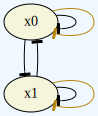

In [5]:
net_spec = 'x0 : <+> - x0 - x0 x1\n x1 : <+> - x1 - x0 x1'

network = DSGRN.Network(net_spec, 'Ecology')

DSGRN.DrawGraph(network)

In [6]:
# The original parameter graph
parameter_graph = DSGRN.ParameterGraph(network)

print("There are " + str(parameter_graph.size()) + " nodes in the parameter graph.")

There are 9216 nodes in the parameter graph.


In [7]:
# Filtered parameter graph at level 1
parameter_graph = DSGRN.ParameterGraphEcology(network)

print("There are " + str(parameter_graph.size()) + " nodes in the parameter graph.")

There are 2304 nodes in the parameter graph.


In [8]:
# Filtered parameter graph at level 2
parameter_graph = DSGRN.ParameterGraphEcology(network, filter_level=2)

print("There are " + str(parameter_graph.size()) + " nodes in the parameter graph.")

There are 64 nodes in the parameter graph.


In [9]:
for par_index in range(parameter_graph.size()):
    partial_order = DSGRN.parameter_inequalities(parameter_graph, par_index)
    print('')
    print(partial_order[0])
    print(partial_order[1])


x0: (p0, p2, p4, p6, T[x0->x0, 1], T[x0->x1, 0], T[x0->x0, 0], p1, p3, p5, p7)
x1: (p0, p2, p4, p6, T[x1->x0, 0], T[x1->x1, 1], T[x1->x1, 0], p1, p3, p5, p7)

x0: (p0, p2, p4, T[x0->x0, 1], p6, T[x0->x1, 0], T[x0->x0, 0], p1, p3, p5, p7)
x1: (p0, p2, p4, p6, T[x1->x0, 0], T[x1->x1, 1], T[x1->x1, 0], p1, p3, p5, p7)

x0: (p0, p2, p4, T[x0->x0, 1], T[x0->x1, 0], p6, T[x0->x0, 0], p1, p3, p5, p7)
x1: (p0, p2, p4, p6, T[x1->x0, 0], T[x1->x1, 1], T[x1->x1, 0], p1, p3, p5, p7)

x0: (p0, p2, p4, T[x0->x0, 1], T[x0->x1, 0], T[x0->x0, 0], p1, p3, p5, p6, p7)
x1: (p0, p2, p4, p6, T[x1->x0, 0], T[x1->x1, 1], T[x1->x1, 0], p1, p3, p5, p7)

x0: (p0, p2, p4, p6, T[x0->x0, 1], T[x0->x1, 0], T[x0->x0, 0], p1, p3, p5, p7)
x1: (p0, p2, p4, T[x1->x0, 0], p6, T[x1->x1, 1], T[x1->x1, 0], p1, p3, p5, p7)

x0: (p0, p2, p4, T[x0->x0, 1], p6, T[x0->x1, 0], T[x0->x0, 0], p1, p3, p5, p7)
x1: (p0, p2, p4, T[x1->x0, 0], p6, T[x1->x1, 1], T[x1->x1, 0], p1, p3, p5, p7)

x0: (p0, p2, p4, T[x0->x0, 1], T[x0->x1, 0], 

# Checking the parameter filtering

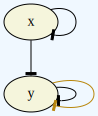

In [10]:
net_spec = 'x : <+> - x\n y : <+> - y - x y'

network = DSGRN.Network(net_spec, 'Ecology')

DSGRN.DrawGraph(network)

In [11]:
# Let's defined the full (unfiltered) parameter graph
# and the filtered Ecology parameter graph

# Full parameter graph
pg_full = DSGRN.ParameterGraph(network)

# Ecology parameter graph
pg = DSGRN.ParameterGraphEcology(network)

In [12]:
print("There are " + str(pg_full.size()) + " nodes in the full parameter graph.")
print("There are " + str(pg.size()) + " nodes in the ecology parameter graph.")

There are 36 nodes in the full parameter graph.
There are 18 nodes in the ecology parameter graph.


In [13]:
# Let's get the valid parameter indices in the full parameter graph
valid_indices = [pg.index2full_index(pi) for pi in range(pg.size())]

In [14]:
valid_indices

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 20, 23, 26, 29, 32, 35]

In [15]:
# Now let's get the indices that were filtered out
removed_indices = [pi for pi in range(pg_full.size()) if pi not in valid_indices]

In [16]:
removed_indices

[0, 3, 6, 9, 12, 15, 18, 19, 21, 22, 24, 25, 27, 28, 30, 31, 33, 34]

In [17]:
# Let's print the partial order for the valid indices
for p_index in valid_indices:
    print(DSGRN.parameter_inequalities(pg_full, p_index))

['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, p6, T[y->y, 0], p1, p3, p5, T[y->y, 1], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, p6, T[y->y, 0], T[y->y, 1], p1, p3, p5, p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], p1, p3, p5, p6, T[y->y, 1], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], p6, T[y->y, 1], p1, p3, p5, p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], p1, p3, p5, T[y->y, 1], p6, p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], T[y->y, 1], p1, p3, p5, p6, p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p2, p4, p6, T[y->y, 0], p1, p3, p5, T[y->y, 1], p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p2, p4, p6, T[y->y, 0], T[y->y, 1], p1, p3, p5, p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], p1, p3, p5, p6, T[y->y, 1], p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], p6, 

In [18]:
# Let's print the partial order for the removed indices
for p_index in removed_indices:
    print(DSGRN.parameter_inequalities(pg_full, p_index))

['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, p6, T[y->y, 0], T[y->y, 1], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, T[y->y, 0], p6, T[y->y, 1], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, T[y->y, 0], T[y->y, 1], p6, p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, p6, T[y->y, 0], T[y->y, 1], p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, T[y->y, 0], p6, T[y->y, 1], p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, T[y->y, 0], T[y->y, 1], p6, p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, p6, T[y->y, 1], T[y->y, 0], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, p6, T[y->y, 1], p1, p3, p5, T[y->y, 0], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, T[y->y, 1], p6, T[y->y, 0], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, T[y->y, 1], p1, 

# More examples

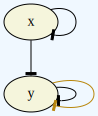

In [19]:
net_spec = 'x : <+> - x\n y : <+> - y - x y'

network = DSGRN.Network(net_spec, 'Ecology')

DSGRN.DrawGraph(network)

In [20]:
print('inputs:', network.inputs(0), network.inputs(1))
print('outputs:', network.outputs(0), network.outputs(1))
print('logics:', network.logic(0), network.logic(1))

inputs: [0] [1, 0, 1]
outputs: [0, 1] [1, 1]
logics: [[0]] [[1], [0, 1]]


In [21]:
network.domains()

[3, 3]

In [22]:
parameter_graph = DSGRN.ParameterGraphEcology(network)

In [23]:
print("There are " + str(parameter_graph.size()) + " nodes in the parameter graph.")

There are 18 nodes in the parameter graph.


In [24]:
database_fname = 'morse_database_all.json'

# Save the whole parameter graph
DSGRN.save_morse_graph_database_json(parameter_graph, database_fname)

In [25]:
par_index = 1

In [26]:
parameter = parameter_graph.parameter(par_index)

In [27]:
print(parameter)

[["x",[1,2,"C"],[0,1]],["y",[3,2,"CCCC"],[0,1]]]


In [28]:
# Get parameter inequalities
par_inequalities = DSGRN.parameter_inequalities(parameter_graph, par_index)

for inequality in par_inequalities:
    print(inequality)

x: (p0, T[x->x, 0], T[x->y, 0], p1)
y: (p0, p2, p4, p6, T[y->y, 0], T[y->y, 1], p1, p3, p5, p7)


In [29]:
domain_graph = DSGRN.DomainGraph(parameter)

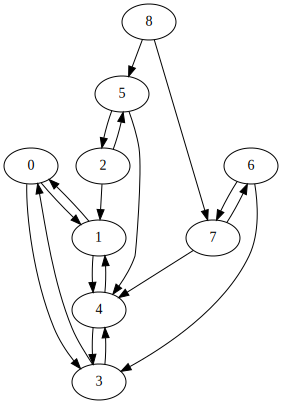

In [30]:
DSGRN.DrawGraph(domain_graph)

In [31]:
morse_decomposition = DSGRN.MorseDecomposition(domain_graph.digraph())

In [32]:
morse_graph = DSGRN.MorseGraph(domain_graph, morse_decomposition)

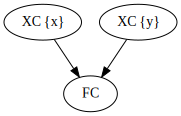

In [33]:
DSGRN.DrawGraph(morse_graph)

In [34]:
network = DSGRN.Network('x0 : <+> - x0 - x0 x1\n x1 : <+> - x1 - x1 x0', 'Ecology')

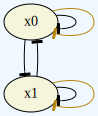

In [35]:
DSGRN.DrawGraph(network)

In [36]:
print('inputs:', network.inputs(0), network.inputs(1))
print('outputs:', network.outputs(0), network.outputs(1))
print('logics:', network.logic(0), network.logic(1))

inputs: [0, 0, 1] [1, 0, 1]
outputs: [0, 0, 1] [0, 1, 1]
logics: [[0], [0, 1]] [[1], [0, 1]]


In [37]:
network.domains()

[4, 4]

In [38]:
parameter_graph = DSGRN.ParameterGraphEcology(network)

In [39]:
print("There are " + str(parameter_graph.size()) + " nodes in the parameter graph.")

There are 2304 nodes in the parameter graph.


In [40]:
database_fname = 'morse_database.json'

# Parameter indices to save on database
param_indices = [0, 1, 3, 7, 9, 2]

DSGRN.save_morse_graph_database_json(parameter_graph, database_fname, param_indices)

In [41]:
database_fname = 'morse_database_large.json'

DSGRN.save_morse_graph_database_json(parameter_graph, database_fname)

In [42]:
par_index = 1273

In [43]:
parameter = parameter_graph.parameter(par_index)

In [44]:
print(parameter)

[["x0",[3,3,"E18618"],[0,1,2]],["x1",[3,3,"FD8618"],[1,2,0]]]


In [45]:
# Get parameter inequalities
par_inequalities = DSGRN.parameter_inequalities(parameter_graph, par_index)

for inequality in par_inequalities:
    print(inequality)

x0: (p0, p2, p4, p6, T[x0->x0, 0], T[x0->x0, 1], p1, p3, p5, T[x0->x1, 0], p7)
x1: (p0, p2, p4, T[x1->x1, 0], T[x1->x1, 1], p1, p3, p5, T[x1->x0, 0], p6, p7)


In [46]:
domain_graph = DSGRN.DomainGraph(parameter)

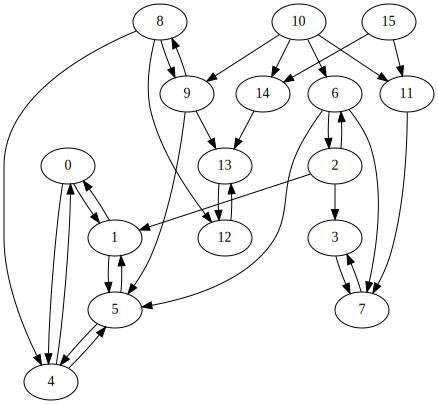

In [47]:
DSGRN.DrawGraph(domain_graph)

In [48]:
morse_decomposition = DSGRN.MorseDecomposition(domain_graph.digraph())

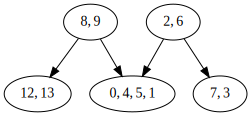

In [49]:
DSGRN.DrawGraph(morse_decomposition)

In [50]:
morsegraph = DSGRN.MorseGraph(domain_graph, morse_decomposition)

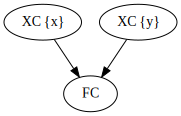

In [51]:
DSGRN.DrawGraph(morse_graph)